In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
def data_gen(k, b, points, percent):
    inline_points = [[x,k*x+b + np.random.normal()] for x in np.random.uniform(0,10, size=int(points*percent))]
    outline_points = [[x,k*x+b + np.random.normal(scale=10.0)] for x in np.random.uniform(0,10, size=int(points*(1-percent)))]
    return np.concatenate((inline_points, outline_points))

In [14]:
data = data_gen(3, 0, 100, 0.8)

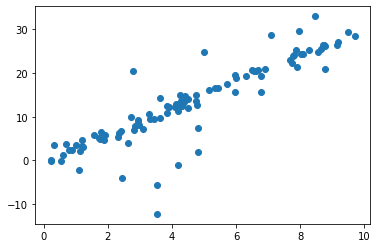

In [15]:
plt.scatter(data[:,0], data[:,1])

In [43]:
def line_ransac(data, iter_num=100, eps=10, inline_min=10):
    best_score = np.inf
    for i in range(iter_num):
        id = np.random.choice(data.shape[0], 2, replace=False)
        p1, p2 = data[id, :]
        
        k = (p2[1] - p1[1]) / (p2[0] - p1[0])
        b = p1[1] - p1[0]*k
        
        inline = []
        error = 0
        
        for p in np.delete(data, id, axis=0):
            d = np.linalg.norm(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)
            if d < eps:
                inline.append(p)
                error += d
        
        if len(inline) < inline_min:
            continue
            
        if error < best_score:
            best_scroe = error
            best_params = k, b
            best_inline = inline
            
    return (best_score, best_params, best_inline)

In [44]:
data = data_gen(3, 0, 100, 0.8)

score, params, inline = line_ransac(data)

score, params, len(inline)

(inf, (2.9096180899749373, 0.051822097257321786), 97)

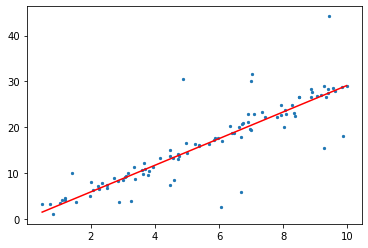

In [45]:
plt.scatter(data[:,0], data[:,1], s=5)
min_var = min(data[:,0])
max_var = max(data[:,0])
k, b = params
plt.plot([min_var, max_var], [k*min_var+b, k*max_var+b], c='r')

In [18]:
data = data_gen(3, 0, 100, 0.8)
id = np.random.choice(data.shape[0], 2, replace=False)

In [19]:
data[id]

array([[ 5.27737401, 16.09052705],
       [ 1.98462393,  4.84177827]])

In [20]:
p1, p2 = data[id[0]], data[id[1]]

In [22]:
p1, p2 = data[id, :]